##__Analysis__

#1: There is a clear correlation between temperature and latitude.  The closer a city is to zero degrees latitude, the warmer it is

#2: There is little relationship between latitude and humidity.  Although there appears to be more cities with lower humidity in the northerm hemisphere, likely because it is currently late winter / early spring and temperatures are cooler

#3: Similarly, there a small relationship between latitude and windspeed.  Although there appears to be more cities with higher wind speeds in the northerm hemisphere, likely because it is currently late winter / early spring and temperatures are cooler.  Additionally, those cities furthest north tend to have the strongest winds.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['kaitangata', 'port alfred', 'sao filipe', 'belushya guba', 'hilo', 'upernavik', 'tazovskiy', 'rikitea', 'tahoua', 'umzimvubu', 'busselton', 'tambun', 'east london', 'tsihombe', 'jamestown', 'rawson', 'bluff', 'vaini', 'new norfolk', 'waycross', 'mayahi', 'abiy adi', 'saint george', 'illoqqortoormiut', 'mataura', 'qaanaaq', 'punta arenas', 'tlacotepec', 'castro', 'chimbote', 'imbituba', 'yellowknife', 'saldanha', 'puerto ayora', 'barrow', 'riviere-au-renard', 'darnah', 'hobart', 'padang', 'belyy yar', 'ulladulla', 'carutapera', 'san quintin', 'saint-pierre', 'ushuaia', 'severo-kurilsk', 'clyde river', 'lompoc', 'thompson', 'salamiyah', 'marabba', 'solsvik', 'amderma', 'nikolskoye', 'paraopeba', 'grindavik', 'yabrud', 'narsaq', 'dikson', 'muros', 'bethel', 'tasiilaq', 'ouesso', 'faya', 'okha', 'zaria', 'kodiak', 'tabuk', 'firminy', 'plettenberg bay', 'dingle', 'necochea', 'kavieng', 'mayo', 'kruisfontein', 'butaritari', 'bacuit', 'albany', 'torbay', 'saskylakh', 'ilulissat', 'bud', 'ba

In [3]:
#create open lists to fill with API call data
temp=[]
temp_max=[]
cloudiness=[]
windspeed=[]
humidity=[]
date=[]
country=[]
lat=[]
lon=[]
ciudad=[]


#build query components
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = '0df8771fc167e239825fa71719c9a3ab'


#build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


#loop to gather data with exceptions
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ciudad.append(response['name'])
    except KeyError:
        print(city + ": name missing")
        ciudad=="N/A"
    try:
        lat.append(response['coord']['lat'])
    except KeyError:
        print(city + ": lat missing")
        lat=="N/A"
    try:
        lon.append(response['coord']['lon'])
    except KeyError:
        print(city + ": lon missing")
        lon=="N/A"
    try:
        country.append(response['sys']['country'])
    except KeyError:
        print(city + ": country missing")
        country=="N/A"
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print(city + ": cloudiness missing")
        cloudiness=="N/A"
    try:
        windspeed.append(response['wind']['speed'])
    except KeyError:
        print(city + ": windspeed missing")
        windspeed=="N/A"
    try:    
        humidity.append(response['main']['humidity'])
    except KeyError:
        print(city + ": humidity missing")
        humidity=="N/A"
    try:
        temp.append(response['main']['temp'])
        print(city + ": temp acquired")
    except KeyError:
        print(city + ": temp missing") 
        temp=="N/A"
    try:
        temp_max.append(response['main']['temp_max'])
    except KeyError:
        print(city + ": temp_max missing")
        temp_max=="N/A"
    try:
        date.append(response['dt'])
    except KeyError:
        print(city + ": date missing") 
        date == "N/A"

kaitangata: temp acquired
port alfred: temp acquired
sao filipe: temp acquired
belushya guba: name missing
belushya guba: lat missing
belushya guba: lon missing
belushya guba: country missing
belushya guba: cloudiness missing
belushya guba: windspeed missing
belushya guba: humidity missing
belushya guba: temp missing
belushya guba: temp_max missing
belushya guba: date missing
hilo: temp acquired
upernavik: temp acquired
tazovskiy: temp acquired
rikitea: temp acquired
tahoua: temp acquired
umzimvubu: name missing
umzimvubu: lat missing
umzimvubu: lon missing
umzimvubu: country missing
umzimvubu: cloudiness missing
umzimvubu: windspeed missing
umzimvubu: humidity missing
umzimvubu: temp missing
umzimvubu: temp_max missing
umzimvubu: date missing
busselton: temp acquired
tambun: temp acquired
east london: temp acquired
tsihombe: name missing
tsihombe: lat missing
tsihombe: lon missing
tsihombe: country missing
tsihombe: cloudiness missing
tsihombe: windspeed missing
tsihombe: humidity mis

cidreira: temp acquired
touros: temp acquired
georgetown: temp acquired
tumannyy: name missing
tumannyy: lat missing
tumannyy: lon missing
tumannyy: country missing
tumannyy: cloudiness missing
tumannyy: windspeed missing
tumannyy: humidity missing
tumannyy: temp missing
tumannyy: temp_max missing
tumannyy: date missing
cruzilia: temp acquired
pangody: temp acquired
tuktoyaktuk: temp acquired
finschhafen: temp acquired
sentyabrskiy: name missing
sentyabrskiy: lat missing
sentyabrskiy: lon missing
sentyabrskiy: country missing
sentyabrskiy: cloudiness missing
sentyabrskiy: windspeed missing
sentyabrskiy: humidity missing
sentyabrskiy: temp missing
sentyabrskiy: temp_max missing
sentyabrskiy: date missing
keene: temp acquired
banjar: temp acquired
beidao: temp acquired
saint-philippe: temp acquired
khatanga: temp acquired
nizhneyansk: name missing
nizhneyansk: lat missing
nizhneyansk: lon missing
nizhneyansk: country missing
nizhneyansk: cloudiness missing
nizhneyansk: windspeed missing


yeppoon: temp acquired
angoram: temp acquired
falun: temp acquired
bogorodskoye: temp acquired
slatyne: temp acquired
talcahuano: temp acquired
rungata: name missing
rungata: lat missing
rungata: lon missing
rungata: country missing
rungata: cloudiness missing
rungata: windspeed missing
rungata: humidity missing
rungata: temp missing
rungata: temp_max missing
rungata: date missing
la mira: temp acquired
okandja: name missing
okandja: lat missing
okandja: lon missing
okandja: country missing
okandja: cloudiness missing
okandja: windspeed missing
okandja: humidity missing
okandja: temp missing
okandja: temp_max missing
okandja: date missing
dibaya: name missing
dibaya: lat missing
dibaya: lon missing
dibaya: country missing
dibaya: cloudiness missing
dibaya: windspeed missing
dibaya: humidity missing
dibaya: temp missing
dibaya: temp_max missing
dibaya: date missing
wad rawah: temp acquired
thunder bay: temp acquired
college: temp acquired
high level: temp acquired
sumbe: temp acquired
m

cap malheureux: temp acquired
kudymkar: temp acquired
mimoso do sul: temp acquired
alice springs: temp acquired
athy: temp acquired
palembang: temp acquired
ouadda: temp acquired
lalomanu: name missing
lalomanu: lat missing
lalomanu: lon missing
lalomanu: country missing
lalomanu: cloudiness missing
lalomanu: windspeed missing
lalomanu: humidity missing
lalomanu: temp missing
lalomanu: temp_max missing
lalomanu: date missing
fukue: temp acquired
mackay: temp acquired
grand river south east: name missing
grand river south east: lat missing
grand river south east: lon missing
grand river south east: country missing
grand river south east: cloudiness missing
grand river south east: windspeed missing
grand river south east: humidity missing
grand river south east: temp missing
grand river south east: temp_max missing
grand river south east: date missing
zlatoustovsk: name missing
zlatoustovsk: lat missing
zlatoustovsk: lon missing
zlatoustovsk: country missing
zlatoustovsk: cloudiness miss

In [61]:
#assess json data structure
pprint(response)

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 20.76, 'lon': -105.33},
 'dt': 1553205313,
 'id': 4016734,
 'main': {'humidity': 74,
          'pressure': 1013,
          'temp': 25.79,
          'temp_max': 26,
          'temp_min': 25.56},
 'name': 'Bucerias',
 'sys': {'country': 'MX',
         'id': 7156,
         'message': 0.0036,
         'sunrise': 1553173475,
         'sunset': 1553217145,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 7.2}}


In [4]:
#create weather dictionary and data frame

weather_dict = {
    "City": ciudad,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Date": date,
    "Temperature": temp,
    "Max Temperature": temp_max,
    "Humidity": humidity,
    "Wind Speed": windspeed,
    "Cloudiness": cloudiness
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Country,Latitude,Longitude,Date,Temperature,Max Temperature,Humidity,Wind Speed,Cloudiness
0,Kaitangata,NZ,-46.28,169.85,1553349028,13.57,13.57,92,1.41,88
1,Port Alfred,ZA,-33.59,26.89,1553349009,27.54,31.67,83,4.02,0
2,Sao Filipe,CV,14.90,-24.50,1553349028,22.47,22.47,91,6.31,0
3,Hilo,US,19.71,-155.08,1553349024,18.16,19.00,88,5.76,20
4,Upernavik,GL,72.79,-56.15,1553349028,-21.68,-21.68,100,5.06,36


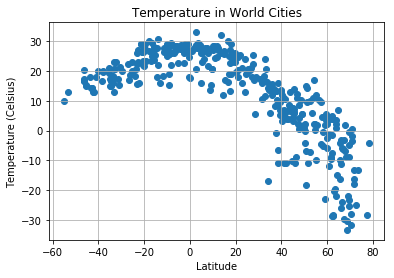

In [5]:
# Build a scatter plot for temperature
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()  

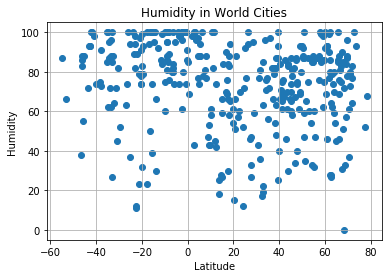

In [6]:
# Build a scatter plot for humidity
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()  

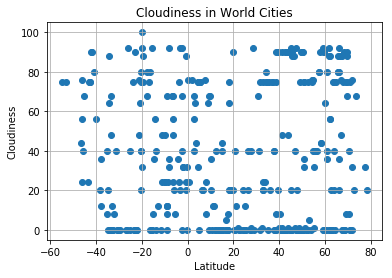

In [7]:
# Build a scatter plot for cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()  

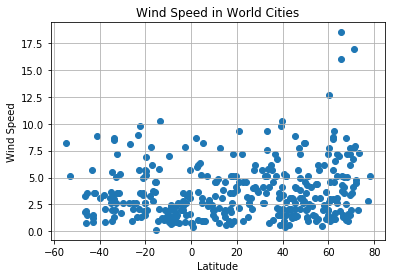

In [8]:
# Build a scatter plot for wind speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()  